# Predict Price using Multiple Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df=pd.read_csv('ToyotaCorolla.csv',encoding='latin-1')

In [3]:
df['Weight']

0       1165
1       1165
2       1165
3       1165
4       1170
        ... 
1431    1025
1432    1015
1433    1015
1434    1015
1435    1114
Name: Weight, Length: 1436, dtype: int64

In [4]:
df.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


# Checking If there are any NA values in the dataset

In [5]:
df.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

# Understanding the Nature of data

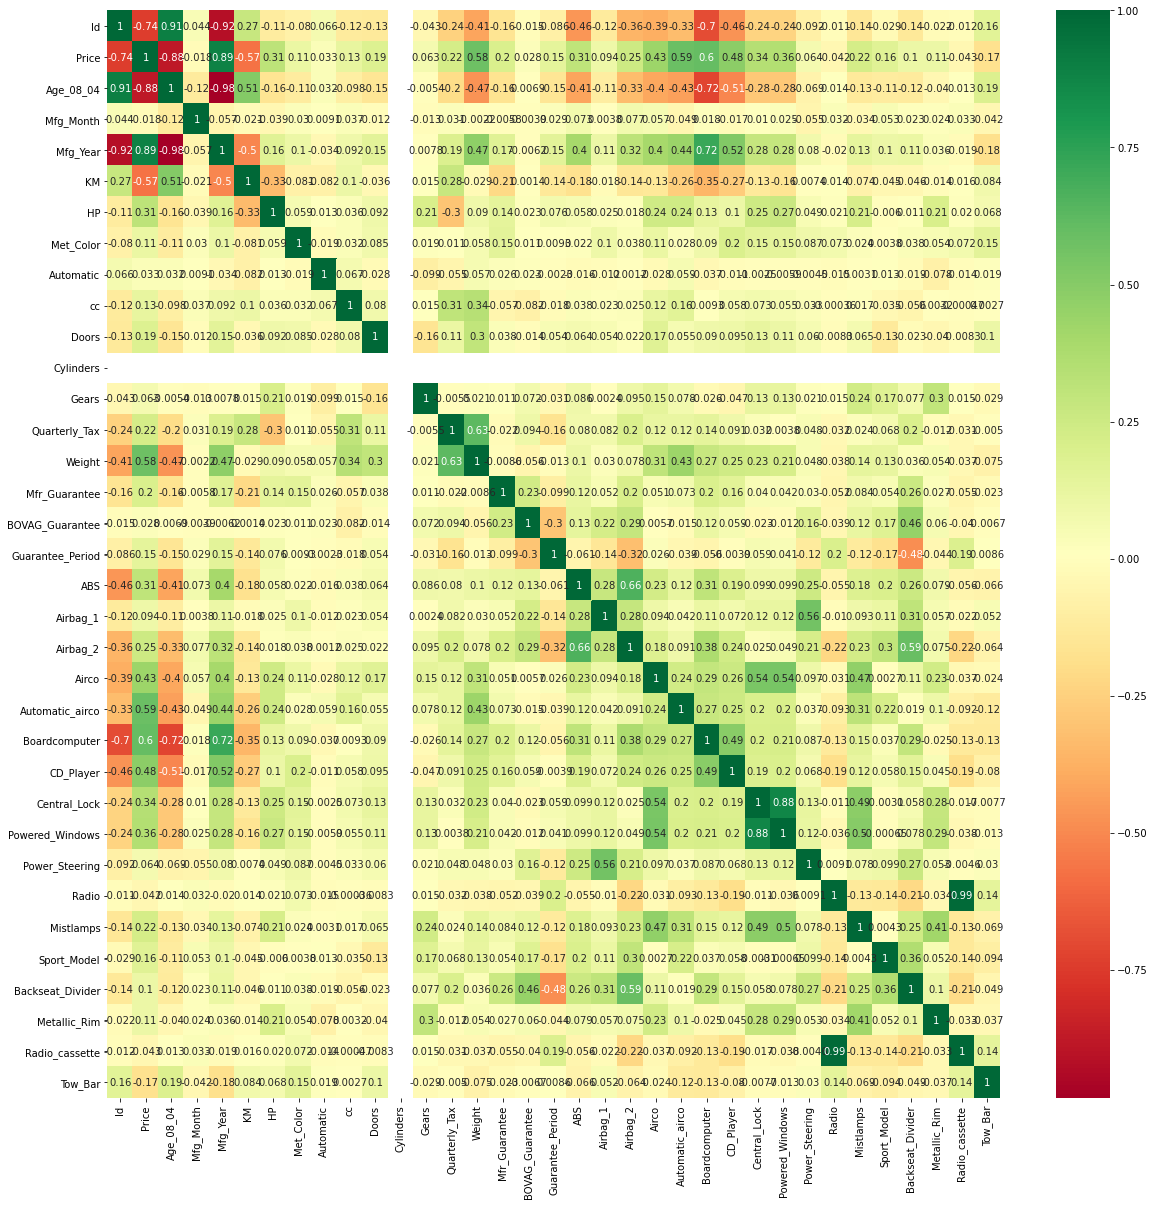

In [6]:
import matplotlib.pyplot as plt
X = df.iloc[:,1:]  #independent columns
y = df.iloc[:,0]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [7]:
corolla=df

{'whiskers': [<matplotlib.lines.Line2D at 0x188a0cdf7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x188a0cdfeb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x188a0cdf490>],
 'medians': [<matplotlib.lines.Line2D at 0x188a0ce65b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x188a0ce6910>],
 'means': []}

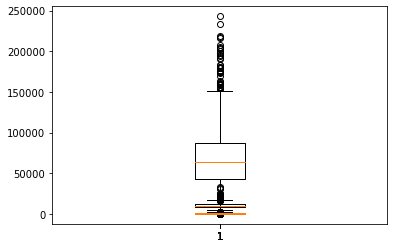

In [8]:
plt.boxplot(corolla['Price'])
plt.boxplot(corolla['Age_08_04'])
plt.boxplot(corolla['KM'])
plt.boxplot(corolla['HP'])
plt.boxplot(corolla['cc'])
plt.boxplot(corolla['Doors'])
plt.boxplot(corolla['Quarterly_Tax'])
plt.boxplot(corolla['Weight'])

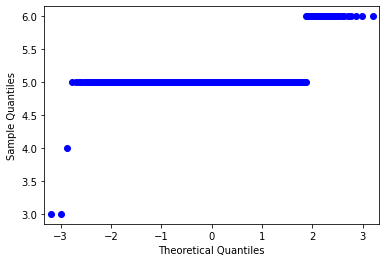

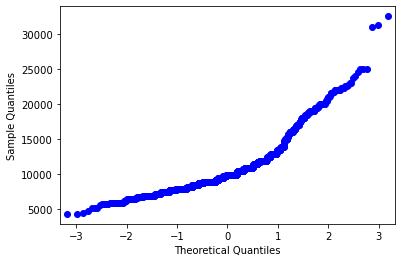

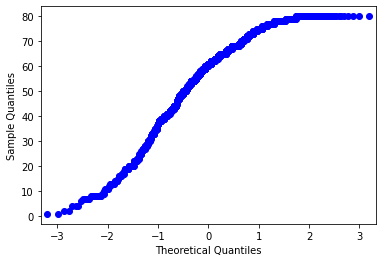

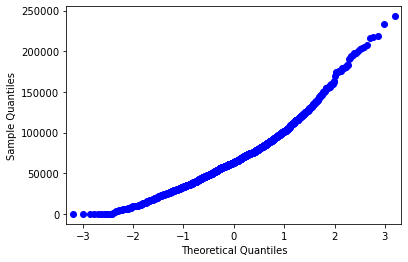

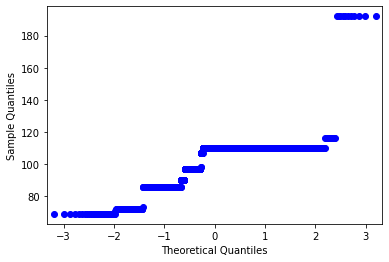

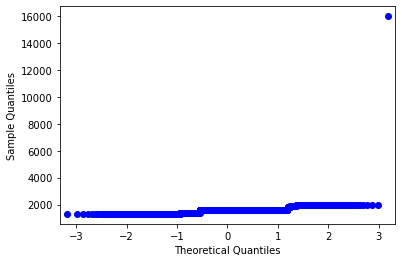

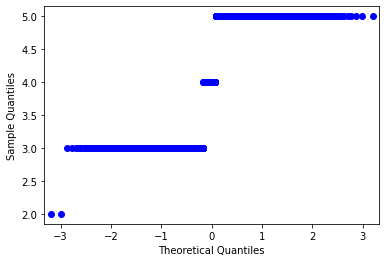

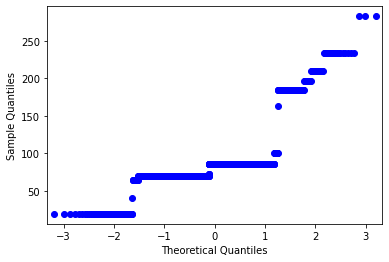

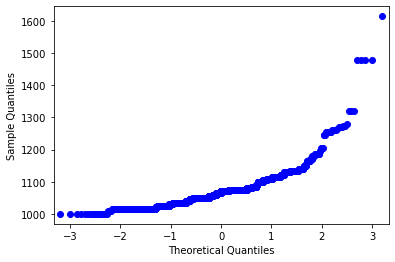

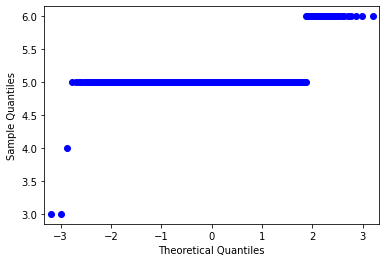

In [9]:
import statsmodels.api as sm
sm.graphics.qqplot(corolla['Price'])
sm.graphics.qqplot(corolla['Age_08_04'])
sm.graphics.qqplot(corolla['KM'])
sm.graphics.qqplot(corolla['HP'])
sm.graphics.qqplot(corolla['cc'])
sm.graphics.qqplot(corolla['Doors'])
sm.graphics.qqplot(corolla['Quarterly_Tax'])
sm.graphics.qqplot(corolla['Weight'])
sm.graphics.qqplot(corolla['Gears'])

(array([110., 706., 343., 114.,  75.,  59.,  22.,   4.,   0.,   3.]),
 array([ 4350.,  7165.,  9980., 12795., 15610., 18425., 21240., 24055.,
        26870., 29685., 32500.]),
 <BarContainer object of 10 artists>)

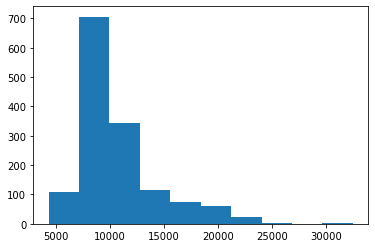

In [10]:
plt.hist(corolla["Price"])

(array([122., 331., 417., 301., 140.,  64.,  30.,  17.,  12.,   2.]),
 array([1.000000e+00, 2.430090e+04, 4.860080e+04, 7.290070e+04,
        9.720060e+04, 1.215005e+05, 1.458004e+05, 1.701003e+05,
        1.944002e+05, 2.187001e+05, 2.430000e+05]),
 <BarContainer object of 10 artists>)

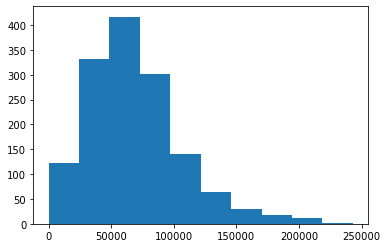

In [11]:
plt.hist(corolla["KM"])

(array([109., 285., 166., 865.,   0.,   0.,   0.,   0.,   0.,  11.]),
 array([ 69. ,  81.3,  93.6, 105.9, 118.2, 130.5, 142.8, 155.1, 167.4,
        179.7, 192. ]),
 <BarContainer object of 10 artists>)

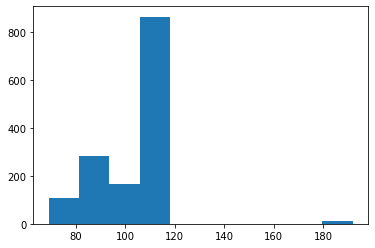

In [12]:
plt.hist(corolla["HP"])

(array([ 73., 577., 616.,  19.,   0.,   1., 110.,  18.,  19.,   3.]),
 array([ 19. ,  45.4,  71.8,  98.2, 124.6, 151. , 177.4, 203.8, 230.2,
        256.6, 283. ]),
 <BarContainer object of 10 artists>)

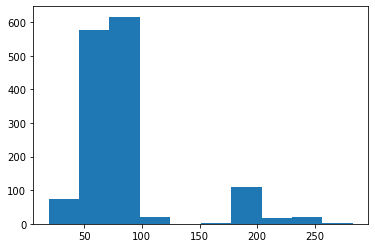

In [13]:
plt.hist(corolla["Quarterly_Tax"])


(array([664., 620., 107.,  18.,  19.,   3.,   0.,   4.,   0.,   1.]),
 array([1000. , 1061.5, 1123. , 1184.5, 1246. , 1307.5, 1369. , 1430.5,
        1492. , 1553.5, 1615. ]),
 <BarContainer object of 10 artists>)

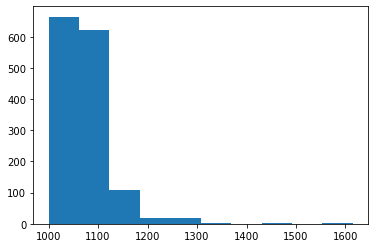

In [14]:
plt.hist(corolla["Weight"])


# Model Building
Model 1-

In [15]:
y=df['Price']

In [16]:
x1=df['Age_08_04']
x2=df['KM']
x3=df['cc']
x4=df['Doors']
x5=df['Gears']
x6=df['Weight']

In [17]:
import statsmodels.formula.api as smf
model=smf.ols("y~x1+x2+x3+x4+x5+x6",data=df).fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1366.
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        22:47:57   Log-Likelihood:                -12437.
No. Observations:                1436   AIC:                         2.489e+04
Df Residuals:                    1429   BIC:                         2.493e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7523.0256   1371.477     -5.485      0.000   -1.02e+04   -4832.702
x1          -120.1672      2.714    -44.275      0.000    -125.491    -114.843
x2            -0.0242      0.001    -20.274      0.000      -0.027      -0.022
x3            -0.0385      0.093     -0.414      0.679      -0.221       0.144
x4            36.0157     41.375      0.870      0.384     -45.147     117.178
x5          1141.6026    199.228      5.730      0.000     750.793    1532.413
x6            19.4072      0.899     21.590      0.000      17.644      21.171
==============================================================================
Omnibus:                      222.575   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2104.858
Skew:                          -0.402   Prob(JB):                         0.00
Kurtosis:                       8.877   Cond. No.                     2.92e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
newdata=pd.DataFrame({'x1':21,'x2':41711,'x3':1300,'x4':3,'x5':5,'x6':1247},index=[1])

In [20]:
model.predict(newdata)

1    18910.30575
dtype: float64

Model 2-

In [21]:
corolla1=corolla

In [22]:
import statsmodels.formula.api as smf
m2= smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= corolla1).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        22:47:57   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Performing EDA

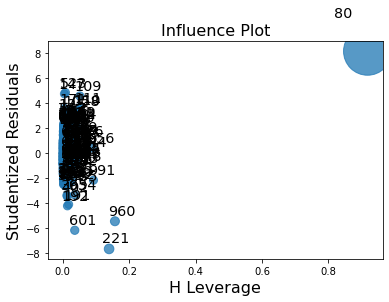

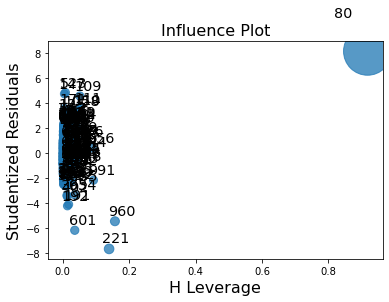

In [23]:
import statsmodels.api as sm
sm.graphics.influence_plot(m2)

In [24]:
corolla2= corolla1.drop(corolla1.index[[654,991,109]],axis=0)

Model 3-

In [25]:
import statsmodels.formula.api as smf
finalmodel= smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= corolla2).fit()
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1127.
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        22:48:01   Log-Likelihood:                -12333.
No. Observations:                1433   AIC:                         2.468e+04
Df Residuals:                    1424   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4826.8680   1435.339     -3.363      0.001   -7642.473   -2011.263
Age_08_04      -121.8620      2.594    -46.973      0.000    -126.951    -116.773
KM               -0.0203      0.001    -16.373      0.000      -0.023      -0.018
HP               31.4819      2.799     11.247      0.000      25.991      36.973
cc               -0.1029      0.089     -1.155      0.248      -0.278       0.072
Doors            -9.7551     39.780     -0.245      0.806     -87.789      68.279
Gears           469.1945    204.234      2.297      0.022      68.563     869.827
Quarterly_Tax     3.2264      1.307      2.468      0.014       0.662       5.791
Weight           16.9106      1.088     15.541      0.000      14.776      19.045
==============================================================================
Omnibus:                      153.360   Durbin-Watson:                   1.557
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              999.668
Skew:                          -0.244   Prob(JB):                    8.41e-218
Kurtosis:                       7.062   Cond. No.                     3.21e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
finalmodel_pred = finalmodel.predict(corolla2)

In [27]:
finalmodel_pred

0       16738.005525
1       16210.615670
2       16723.344799
3       16351.812343
4       16141.981087
            ...     
1431     8793.443125
1432     8290.129078
1433     8452.311016
1434     8576.205315
1435    10406.786723
Length: 1433, dtype: float64

Text(0, 0.5, 'Predicted values')

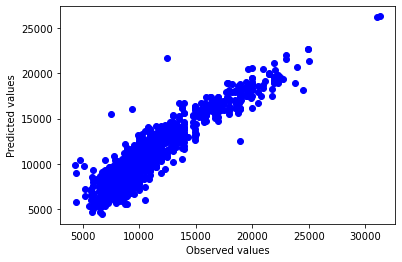

In [28]:
plt.scatter(corolla2["Price"],finalmodel_pred,c='b');plt.xlabel("Observed values");plt.ylabel("Predicted values")

((array([-3.29990572, -3.0423199 , -2.89905096, ...,  2.89905096,
          3.0423199 ,  3.29990572]),
  array([-6.99768279, -6.05734977, -5.03925042, ...,  3.71958273,
          4.77666444,  4.81763933])),
 (0.9808206053782266, -8.490461120941428e-13, 0.9819222054472959))

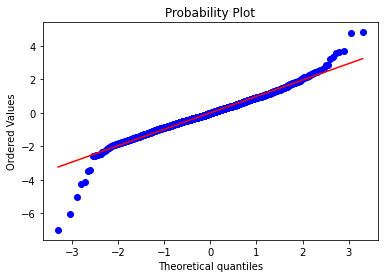

In [29]:
import pylab
import scipy.stats as st
st.probplot(finalmodel.resid_pearson, dist='norm',plot=pylab)

In [30]:
from sklearn.model_selection import train_test_split
train_data,test_Data= train_test_split(corolla,test_size=0.3)



Model 4-

In [31]:
finalmodel1 = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = train_data).fit()
finalmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     756.6
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        22:48:02   Log-Likelihood:                -8671.4
No. Observations:                1005   AIC:                         1.736e+04
Df Residuals:                     996   BIC:                         1.741e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3587.1605   1665.410     -2.154      0.031   -6855.276    -319.045
Age_08_04      -120.6486      3.109    -38.803      0.000    -126.750    -114.547
KM               -0.0211      0.001    -14.438      0.000      -0.024      -0.018
HP               32.3585      3.369      9.605      0.000      25.748      38.969
cc               -0.0303      0.092     -0.328      0.743      -0.211       0.151
Doors            20.0324     48.080      0.417      0.677     -74.317     114.381
Gears           506.6282    241.321      2.099      0.036      33.072     980.184
Quarterly_Tax     4.1999      1.503      2.795      0.005       1.251       7.149
Weight           15.1961      1.214     12.520      0.000      12.814      17.578
==============================================================================
Omnibus:                      104.821   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              618.306
Skew:                          -0.251   Prob(JB):                    5.45e-135
Kurtosis:                       6.810   Cond. No.                     3.08e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
finalmodel_pred = finalmodel1.predict(train_data)
finalmodel_pred 

324     13813.493075
581     11027.204204
250     14098.898894
1239     6438.497988
1065     5306.929487
            ...     
938      9520.310858
1201     8693.116073
773      9522.015256
458     11229.035480
306     11835.581204
Length: 1005, dtype: float64

In [33]:
finalmodel_res = train_data["Price"]-finalmodel_pred
finalmodel_res

324     -863.493075
581     -527.204204
250    -2348.898894
1239     511.502012
1065    1243.070513
           ...     
938     -620.310858
1201    -843.116073
773     1427.984744
458    -2534.035480
306    -1885.581204
Length: 1005, dtype: float64

In [34]:
finalmodel_rmse = np.sqrt(np.mean(finalmodel_res*finalmodel_res))
finalmodel_rmse

1351.9890003613034